In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("../results/luckylotto_gpt.csv")

In [87]:
temp_0_A_vs_B = [col for col in df.columns if '_temp_0_A_vs_B' in col]
temp_0_B_vs_C = [col for col in df.columns if '_temp_0_B_vs_C' in col]
temp_0_C_vs_A = [col for col in df.columns if '_temp_0_C_vs_A' in col]

# Create a dictionary to store cycle counts for each model
cycle_counts = {}

for a_b_col, b_c_col, c_a_col in zip(temp_0_A_vs_B, temp_0_B_vs_C, temp_0_C_vs_A):
    model_name = a_b_col.split('_temp_0_')[0]  # Extract model name (e.g., 'gpt-3.5-turbo')
    
    # Check for cycles: all three comparisons must be distinct
    df[f'{model_name}_is_cycle'] = (
        (df[a_b_col] != df[b_c_col]) &
        (df[b_c_col] != df[c_a_col]) &
        (df[c_a_col] != df[a_b_col])
    )
    
    # Count cycles per digit length
    cycle_counts[model_name] = df.groupby('Digit_Length')[f'{model_name}_is_cycle'].mean()

# Combine all cycle counts into a single DataFrame
cycle_counts_df = pd.DataFrame(cycle_counts)


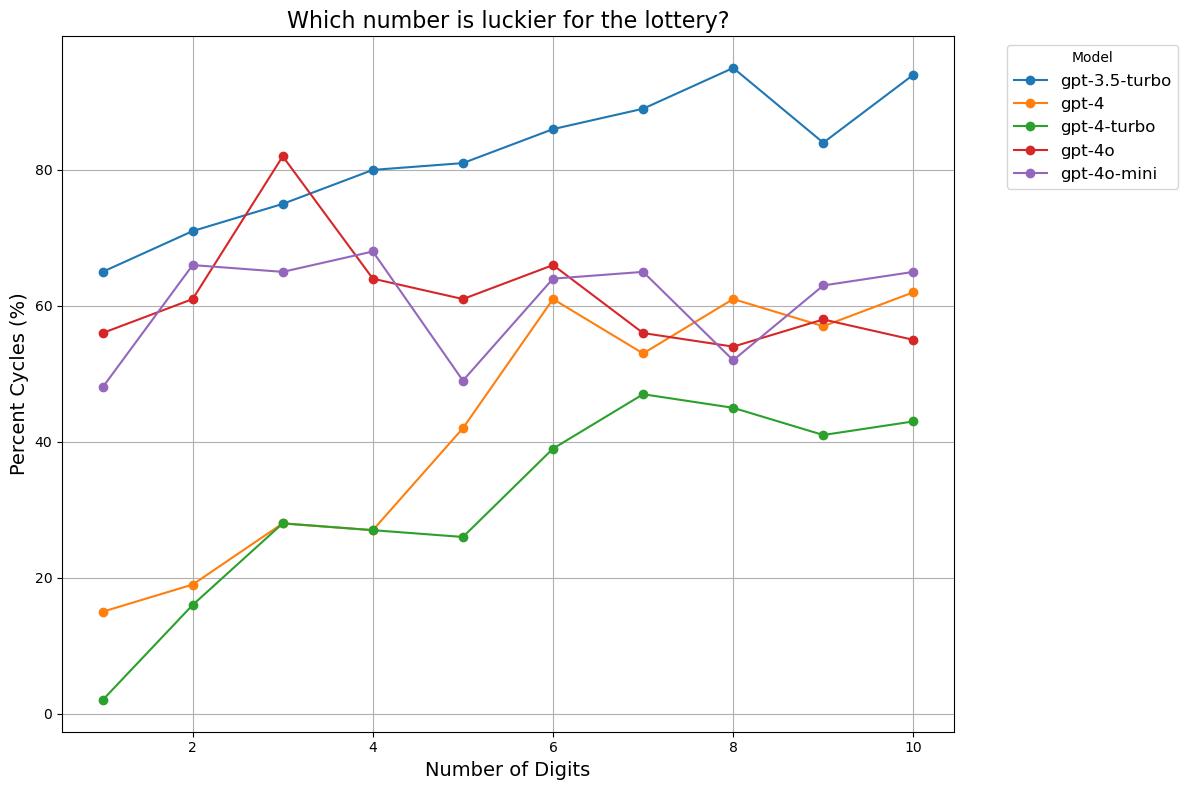

<Figure size 640x480 with 0 Axes>

In [88]:
# Convert proportions to percentages
cycle_counts_percentage = cycle_counts_df * 100

# Create the plot
plt.figure(figsize=(12, 8))

# Plotting each model's data
for model in cycle_counts_percentage.columns:
    plt.plot(
        cycle_counts_percentage.index, 
        cycle_counts_percentage[model], 
        marker='o', 
        label=model
    )

# Adding titles and labels
plt.title("Which number is luckier for the lottery?", fontsize=16)
plt.xlabel("Number of Digits", fontsize=14)
plt.ylabel("Percent Cycles (%)", fontsize=14)

# Adding legend
plt.legend(title="Model", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding grid
plt.grid(visible=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

plt.savefig("feels_nicer_gpt_cycles.png", dpi=300)

In [56]:
print("Available columns in the DataFrame:")
print(df.columns)

Available columns in the DataFrame:
Index(['Digit_Length', 'A', 'B', 'C', 'gpt-3.5-turbo_temp_0_A_vs_B',
       'gpt-3.5-turbo_temp_0.7_A_vs_B', 'gpt-4_temp_0_A_vs_B',
       'gpt-4_temp_0.7_A_vs_B', 'gpt-4-turbo_temp_0_A_vs_B',
       'gpt-4-turbo_temp_0.7_A_vs_B', 'gpt-4o_temp_0_A_vs_B',
       'gpt-4o_temp_0.7_A_vs_B', 'gpt-4o-mini_temp_0_A_vs_B',
       'gpt-4o-mini_temp_0.7_A_vs_B', 'gpt-3.5-turbo_temp_0_B_vs_C',
       'gpt-3.5-turbo_temp_0.7_B_vs_C', 'gpt-4_temp_0_B_vs_C',
       'gpt-4_temp_0.7_B_vs_C', 'gpt-4-turbo_temp_0_B_vs_C',
       'gpt-4-turbo_temp_0.7_B_vs_C', 'gpt-4o_temp_0_B_vs_C',
       'gpt-4o_temp_0.7_B_vs_C', 'gpt-4o-mini_temp_0_B_vs_C',
       'gpt-4o-mini_temp_0.7_B_vs_C', 'gpt-3.5-turbo_temp_0_C_vs_A',
       'gpt-3.5-turbo_temp_0.7_C_vs_A', 'gpt-4_temp_0_C_vs_A',
       'gpt-4_temp_0.7_C_vs_A', 'gpt-4-turbo_temp_0_C_vs_A',
       'gpt-4-turbo_temp_0.7_C_vs_A', 'gpt-4o_temp_0_C_vs_A',
       'gpt-4o_temp_0.7_C_vs_A', 'gpt-4o-mini_temp_0_C_vs_A',
       'gpt-4

Data loaded successfully.
           Model  Temperature    Word_A   Weight_A    Word_B   Weight_B  \
0  gpt-3.5-turbo          0.0      busy  12.316517      sail  11.659888   
1  gpt-3.5-turbo          0.0  designer  13.623672  forwards  10.515193   
2  gpt-3.5-turbo          0.0    loudly  11.669725  surprise  14.959070   
3  gpt-3.5-turbo          0.0     quick  14.304682      join  14.970496   
4  gpt-3.5-turbo          0.0        on  15.755682      boat   9.761983   

   Word_C   Weight_C    A_vs_B    B_vs_C      C_vs_A Better_Word  \
0      as  16.829153      Sail      Sail      'Busy'          as   
1      up  14.201604  Designer  Forwards  'designer'          up   
2  enough  16.980229  Surprise  'Enough'      Loudly      enough   
3  wallet  14.963922    'Join'    'Join'    'Wallet'        join   
4    word  15.040364      boat    'Word'      'Word'          on   

   Ground_Truth_Better  Cycle  
0                False    NaN  
1                 True    NaN  
2                 

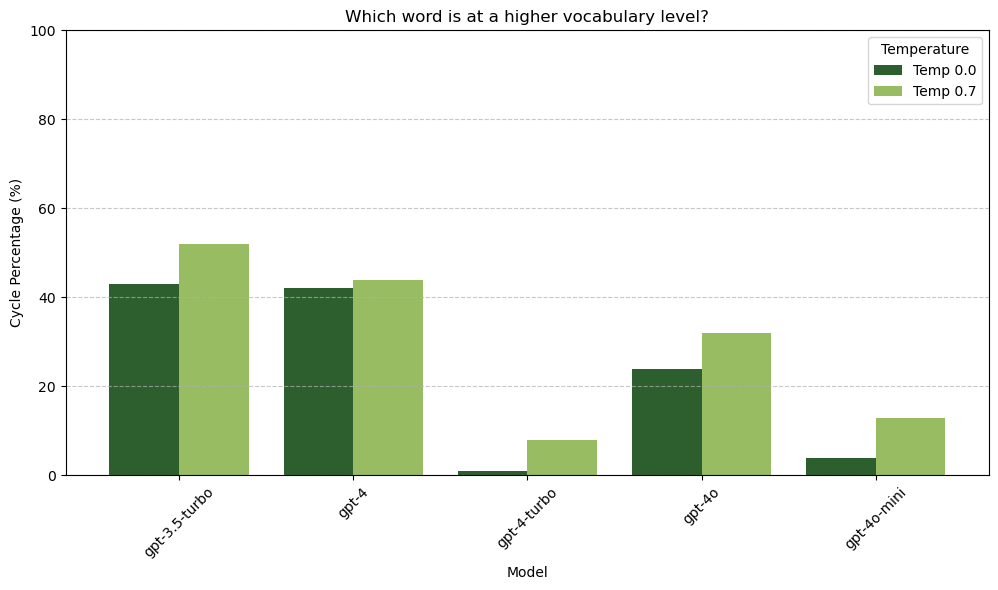

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
try:
    df = pd.read_csv("../results/word_preferences_multiple_models.csv")
    print("Data loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("The file 'word_advanced.csv' was not found. Please check the file path.")

# Normalize capitalization for all comparison outputs
df["A_vs_B"] = df["A_vs_B"].str.lower()
df["B_vs_C"] = df["B_vs_C"].str.lower()
df["C_vs_A"] = df["C_vs_A"].str.lower()

# Check for cycles
df["Cycle"] = (
    (df["A_vs_B"] != df["B_vs_C"]) &
    (df["B_vs_C"] != df["C_vs_A"]) &
    (df["C_vs_A"] != df["A_vs_B"])
)

# Map cycles to integers for easier computation
df["Cycle"] = df["Cycle"].astype(int)

# Calculate cycle percentages for each model and temperature
cycle_summary = (
    df.groupby(["Model", "Temperature"])["Cycle"]
    .mean()
    .reset_index()
    .rename(columns={"Cycle": "Cycle_Percentage"})
)
cycle_summary["Cycle_Percentage"] *= 100  # Convert to percentage

# Print the summary for verification
print(cycle_summary)

# Pivot data to prepare for grouped bar plot
pivot_data = cycle_summary.pivot(index="Model", columns="Temperature", values="Cycle_Percentage")

# Assign custom colors for each temperature
bar_colors = {0: "#2C5F2D", 0.7: "#97BC62"}  # Colors for temp=0 and temp=0.7
#bar_colors = {0: "#735DA5", 0.7: "#D3C5E5"}
# Create a grouped bar chart
ax = pivot_data.plot(
    kind="bar",
    figsize=(10, 6),
    width=0.8,
    color=[bar_colors[col] for col in pivot_data.columns]
)

# Customize the chart
plt.title("Which word is at a higher vocabulary level?")
plt.xlabel("Model")
plt.ylabel("Cycle Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Temperature", labels=[f"Temp {col}" for col in pivot_data.columns])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
ax.set_ylim(0, 100)
# Show the plot
plt.show()

Data loaded successfully.
           Model  Temperature     Word_A   Weight_A    Word_B   Weight_B  \
0  gpt-3.5-turbo          0.0       jump  13.440290       lie  12.337807   
1  gpt-3.5-turbo          0.0      these  15.612900      fact  17.320789   
2  gpt-3.5-turbo          0.0      black  12.590223     worth  16.875462   
3  gpt-3.5-turbo          0.0     likely  19.021831  accident  13.975636   
4  gpt-3.5-turbo          0.0  sometimes  14.641332     study  14.565372   

    Word_C   Weight_C    A_vs_B     B_vs_C       C_vs_A Better_Word  \
0   likely  19.021831     'lie'   'Likely'     'likely'      likely   
1  problem  14.970357    'fact'  'Problem'      'these'        fact   
2  weather  13.622964   'Worth'  'Weather'    'Weather'       worth   
3  explain  15.766122  'likely'  'Explain'    'Explain'      likely   
4   fourth  12.850952   'study'   'fourth'  'sometimes'   sometimes   

   Ground_Truth_Better  Cycle  
0                False    NaN  
1                 True    

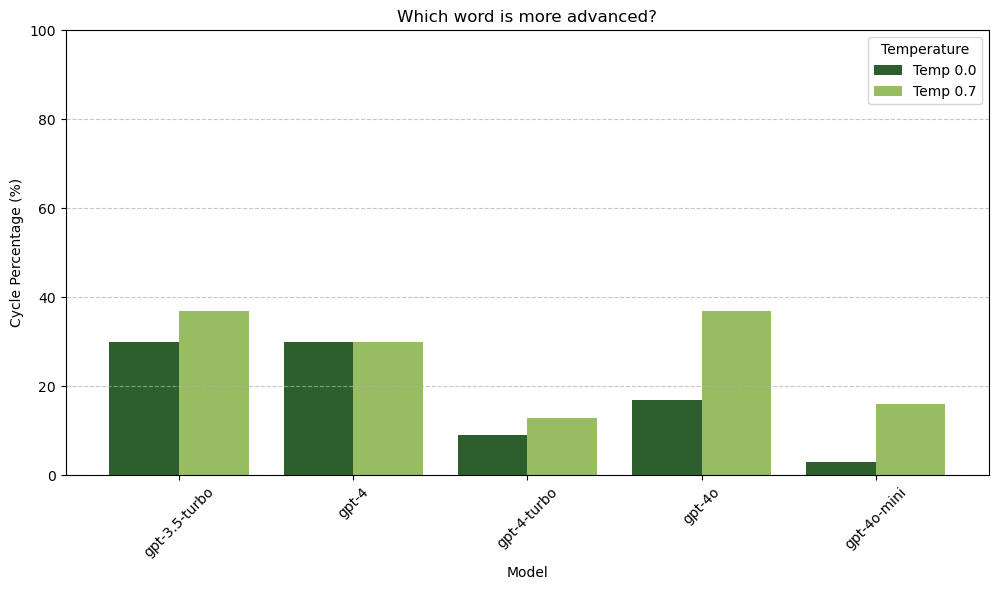

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
try:
    df = pd.read_csv("../results/word_advanced.csv")
    print("Data loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("The file 'word_advanced.csv' was not found. Please check the file path.")

# Normalize capitalization for all comparison outputs
df["A_vs_B"] = df["A_vs_B"].str.lower()
df["B_vs_C"] = df["B_vs_C"].str.lower()
df["C_vs_A"] = df["C_vs_A"].str.lower()

# Check for cycles
df["Cycle"] = (
    (df["A_vs_B"] != df["B_vs_C"]) &
    (df["B_vs_C"] != df["C_vs_A"]) &
    (df["C_vs_A"] != df["A_vs_B"])
)

# Map cycles to integers for easier computation
df["Cycle"] = df["Cycle"].astype(int)

# Calculate cycle percentages for each model and temperature
cycle_summary = (
    df.groupby(["Model", "Temperature"])["Cycle"]
    .mean()
    .reset_index()
    .rename(columns={"Cycle": "Cycle_Percentage"})
)
cycle_summary["Cycle_Percentage"] *= 100  # Convert to percentage

# Print the summary for verification
print(cycle_summary)

# Pivot data to prepare for grouped bar plot
pivot_data = cycle_summary.pivot(index="Model", columns="Temperature", values="Cycle_Percentage")

# Assign custom colors for each temperature
bar_colors = {0: "#2C5F2D", 0.7: "#97BC62"}  # Colors for temp=0 and temp=0.7
#bar_colors = {0: "#735DA5", 0.7: "#D3C5E5"}
# Create a grouped bar chart
ax = pivot_data.plot(
    kind="bar",
    figsize=(10, 6),
    width=0.8,
    color=[bar_colors[col] for col in pivot_data.columns]
)

# Customize the chart
plt.title("Which word is more advanced?")
plt.xlabel("Model")
plt.ylabel("Cycle Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Temperature", labels=[f"Temp {col}" for col in pivot_data.columns])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
ax.set_ylim(0, 100)
# Show the plot
plt.show()

Data loaded successfully.
           Model  Temperature     Word_A   Weight_A   Word_B   Weight_B  \
0  gpt-3.5-turbo          0.0      think  14.129496     half  16.271618   
1  gpt-3.5-turbo          0.0   distance  13.862789  extreme  16.751309   
2  gpt-3.5-turbo          0.0    holiday  13.402373      own  15.969931   
3  gpt-3.5-turbo          0.0  chocolate  12.020632      map  14.111289   
4  gpt-3.5-turbo          0.0       week  14.600667   prefer  15.348110   

     Word_C   Weight_C       A_vs_B    B_vs_C       C_vs_A Better_Word  \
0   italian  13.377267       'half'   Italian      Italian        half   
1     thief  12.722793   'distance'   'thief'   'distance'     extreme   
2      bear  14.743291        'own'    'bear'    'holiday'         own   
3      look  13.848283  'Chocolate'    'look'  'Chocolate'         map   
4  whenever  15.247603     'prefer'  whenever   'whenever'      prefer   

   Ground_Truth_Better  Cycle  
0                False    NaN  
1             

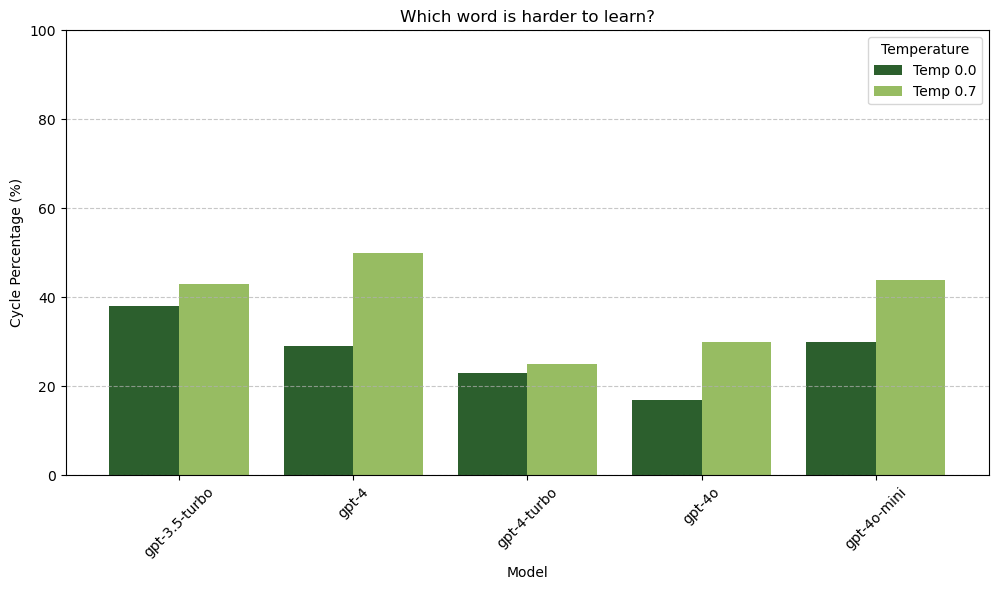

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
try:
    df = pd.read_csv("../results/word_harder_to_learn.csv")
    print("Data loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("The file 'word_advanced.csv' was not found. Please check the file path.")

# Normalize capitalization for all comparison outputs
df["A_vs_B"] = df["A_vs_B"].str.lower()
df["B_vs_C"] = df["B_vs_C"].str.lower()
df["C_vs_A"] = df["C_vs_A"].str.lower()

# Check for cycles
df["Cycle"] = (
    (df["A_vs_B"] != df["B_vs_C"]) &
    (df["B_vs_C"] != df["C_vs_A"]) &
    (df["C_vs_A"] != df["A_vs_B"])
)

# Map cycles to integers for easier computation
df["Cycle"] = df["Cycle"].astype(int)

# Calculate cycle percentages for each model and temperature
cycle_summary = (
    df.groupby(["Model", "Temperature"])["Cycle"]
    .mean()
    .reset_index()
    .rename(columns={"Cycle": "Cycle_Percentage"})
)
cycle_summary["Cycle_Percentage"] *= 100  # Convert to percentage

# Print the summary for verification
print(cycle_summary)

# Pivot data to prepare for grouped bar plot
pivot_data = cycle_summary.pivot(index="Model", columns="Temperature", values="Cycle_Percentage")

# Assign custom colors for each temperature
bar_colors = {0: "#2C5F2D", 0.7: "#97BC62"}  # Colors for temp=0 and temp=0.7
#bar_colors = {0: "#735DA5", 0.7: "#D3C5E5"}
# Create a grouped bar chart
ax = pivot_data.plot(
    kind="bar",
    figsize=(10, 6),
    width=0.8,
    color=[bar_colors[col] for col in pivot_data.columns]
)

# Customize the chart
plt.title("Which word is harder to learn?")
plt.xlabel("Model")
plt.ylabel("Cycle Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Temperature", labels=[f"Temp {col}" for col in pivot_data.columns])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
ax.set_ylim(0, 100)
# Show the plot
plt.show()

In [90]:
print(df.groupby(["Model", "Temperature"])["Cycle"].mean())


Model          Temperature
gpt-3.5-turbo  0.0           NaN
               0.7           NaN
gpt-4          0.0           NaN
               0.7           NaN
gpt-4-turbo    0.0           NaN
               0.7           NaN
gpt-4o         0.0           NaN
               0.7           NaN
gpt-4o-mini    0.0           NaN
               0.7           NaN
Name: Cycle, dtype: float64


/var/folders/7c/51ywrh_d5873y1hsplbpw3qm0000gn/T/ipykernel_89875/1077619443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["A_vs_B_Aligned"] = filtered_df.apply(
/var/folders/7c/51ywrh_d5873y1hsplbpw3qm0000gn/T/ipykernel_89875/1077619443.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["B_vs_C_Aligned"] = filtered_df.apply(
/var/folders/7c/51ywrh_d5873y1hsplbpw3qm0000gn/T/ipykernel_89875/1077619443.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

<Figure size 1000x600 with 0 Axes>

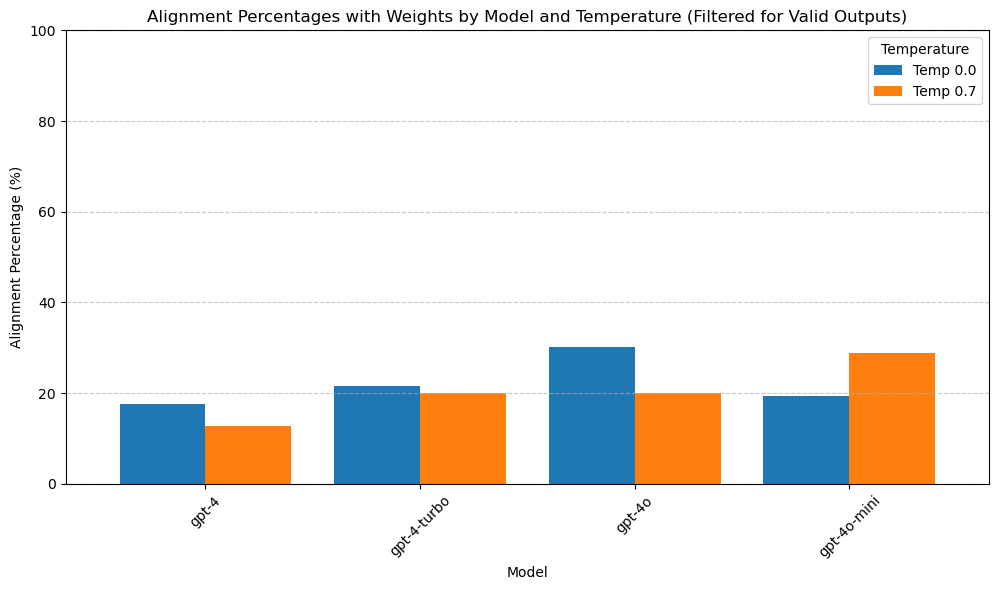

In [124]:
# Filter rows to ensure only valid outputs are considered
valid_words = set(df["Word_A"]) | set(df["Word_B"]) | set(df["Word_C"])

# Filter rows for valid outputs
filtered_df = df[
    df["A_vs_B"].isin(valid_words) &
    df["B_vs_C"].isin(valid_words) &
    df["C_vs_A"].isin(valid_words)
]

# Recalculate the alignment checks for the filtered data
filtered_df["A_vs_B_Aligned"] = filtered_df.apply(
    lambda row: (row["A_vs_B"] == row["Word_A"] if row["Weight_A"] > row["Weight_B"] else row["A_vs_B"] == row["Word_B"]),
    axis=1
)

filtered_df["B_vs_C_Aligned"] = filtered_df.apply(
    lambda row: (row["B_vs_C"] == row["Word_B"] if row["Weight_B"] > row["Weight_C"] else row["B_vs_C"] == row["Word_C"]),
    axis=1
)

filtered_df["C_vs_A_Aligned"] = filtered_df.apply(
    lambda row: (row["C_vs_A"] == row["Word_C"] if row["Weight_C"] > row["Weight_A"] else row["C_vs_A"] == row["Word_A"]),
    axis=1
)

# Recalculate overall alignment
filtered_df["Overall_Aligned"] = filtered_df["A_vs_B_Aligned"] & filtered_df["B_vs_C_Aligned"] & filtered_df["C_vs_A_Aligned"]

# Recalculate alignment summary
alignment_summary_filtered = (
    filtered_df.groupby(["Model", "Temperature"])["Overall_Aligned"]
    .mean()
    .reset_index()
    .rename(columns={"Overall_Aligned": "Alignment_Percentage"})
)
alignment_summary_filtered["Alignment_Percentage"] *= 100  # Convert to percentage

# Pivot data for grouped bar plot
pivot_data_filtered = alignment_summary_filtered.pivot(index="Model", columns="Temperature", values="Alignment_Percentage")

# Plot filtered data
plt.figure(figsize=(10, 6))
alignment_colors = {0: "#1f77b4", 0.7: "#ff7f0e"}  # Custom colors for temperatures
ax = pivot_data_filtered.plot(
    kind="bar",
    figsize=(10, 6),
    width=0.8,
    color=[alignment_colors[col] for col in pivot_data_filtered.columns]
)

# Customize the chart
plt.title("Alignment Percentages with Weights by Model and Temperature (Filtered for Valid Outputs)")
plt.xlabel("Model")
plt.ylabel("Alignment Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Temperature", labels=[f"Temp {col}" for col in pivot_data_filtered.columns])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
ax.set_ylim(0, 100)

# Show the plot
plt.show()


In [120]:
print(df["Overall_Aligned"].value_counts(normalize=True))


Overall_Aligned
False    0.911
True     0.089
Name: proportion, dtype: float64


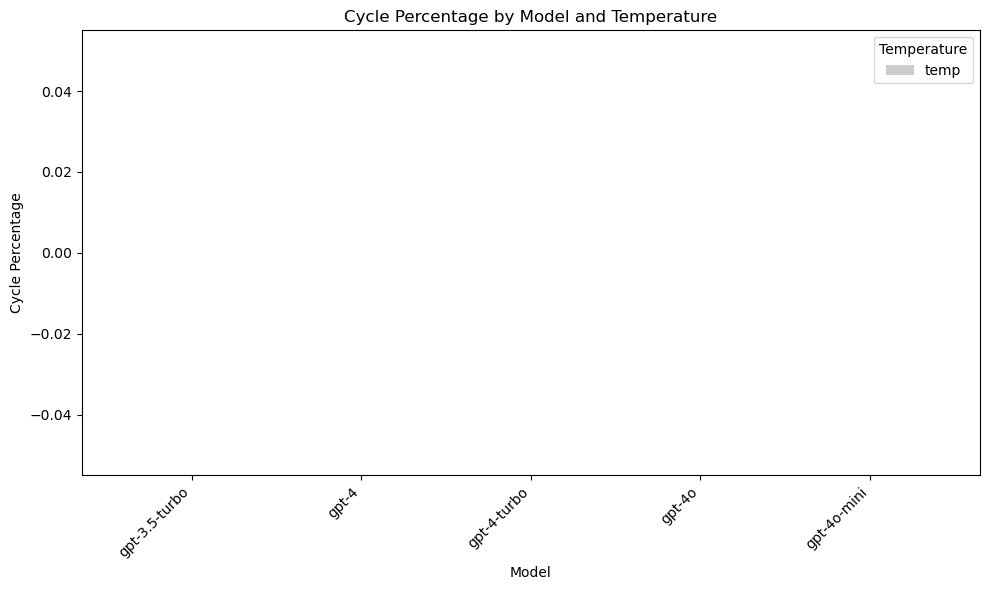

In [135]:

# Metadata columns
metadata_columns = ["OP_Title", "OP_Text", "Argument_1_Text", "Argument_2_Text", "Argument_3_Text"]

# Identify comparison columns
comparison_columns = [col for col in df.columns if col not in metadata_columns]

# Parse and structure data
mapped_rows = []
for col in comparison_columns:
    parts = col.split("_")  # Split by '_'
    model = parts[0]  # e.g., "gpt-3.5-turbo"
    temperature = parts[1]  # e.g., "temp_0"
    comparison = "_".join(parts[2:5])  # e.g., "Arg1_vs_Arg2"
    
    for idx, winner in enumerate(df[col]):
        # Normalize Winner values to integers (if float, convert to int)
        normalized_winner = int(winner) if not pd.isna(winner) else None  # Handle NaN if present
        mapped_rows.append({
            "Model": model,
            "Temperature": temperature,
            "Comparison": comparison,
            "Winner": normalized_winner,
            "Row_Index": idx  # To trace back to original data if needed
        })

# Convert to a structured DataFrame
structured_df = pd.DataFrame(mapped_rows)

# Pivot back to get one row per Model/Temperature with all comparisons
pivoted_df = structured_df.pivot_table(
    index=["Model", "Temperature", "Row_Index"],  # Keep Row_Index to preserve original row grouping
    columns="Comparison",
    values="Winner",
    aggfunc="first"  # Assuming no duplicates for a given Model/Temperature/Comparison
).reset_index()

# Function to count cycles
def count_cycles(row):
    # Extract Winners and ensure all are integers
    winners = [row.get("Arg1_vs_Arg2"), row.get("Arg2_vs_Arg3"), row.get("Arg3_vs_Arg1")]
    if winners == [1, 2, 3] or winners == [2, 3, 1] or winners == [3, 1, 2]:
        return 1  # A cycle exists
    return 0

# Add a Cycle column
pivoted_df["Cycle"] = pivoted_df.apply(count_cycles, axis=1)

# Summarize cycle counts by Model and Temperature
cycle_summary = pivoted_df.groupby(["Model", "Temperature"])["Cycle"].sum().reset_index()

# Calculate percentages
cycle_summary["Cycle_Percentage"] = cycle_summary["Cycle"] / cycle_summary["Cycle"].sum() * 100

# Pivot data for plotting
pivot_data = cycle_summary.pivot(index="Model", columns="Temperature", values="Cycle_Percentage")

# Assign custom colors for each temperature
bar_colors = {"temp_0": "#2C5F2D", "temp_0.7": "#97BC62"}  # Colors for temp=0 and temp=0.7

# Create a grouped bar chart
ax = pivot_data.plot(
    kind="bar",
    figsize=(10, 6),
    width=0.8,
    color=[bar_colors.get(col, "#CCCCCC") for col in pivot_data.columns]
)

plt.xlabel("Model")
plt.ylabel("Cycle Percentage")
plt.title("Cycle Percentage by Model and Temperature")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [145]:
import numpy as np
def find_cycles(row, model_col):
    # Extract preferences for the three comparisons and convert to float
    pref_1_2 = float(row[model_col])  # Arg1 vs Arg2
    pref_2_3 = float(row[model_col.replace('Arg1_vs_Arg2', 'Arg2_vs_Arg3')])  # Arg2 vs Arg3
    pref_3_1 = float(row[model_col.replace('Arg1_vs_Arg2', 'Arg3_vs_Arg1')])  # Arg3 vs Arg1
    
    # Check if there's a cycle (using float comparisons)
    if (pref_1_2 == 1.0 and pref_2_3 == 2.0 and pref_3_1 == 3.0):
        return True  # No cycle - transitive preferences
    elif (pref_1_2 == 2.0 and pref_2_3 == 3.0 and pref_3_1 == 1.0):
        return True  # No cycle - transitive preferences
    return False  # Cycle exists

def analyze_cycles(df):
    # List of base model names
    models = [
        'gpt-3.5-turbo',
        'gpt-4',
        'gpt-4-turbo',
        'gpt-4o',
        'gpt-4o-mini'
    ]
    
    # Initialize results dictionary
    results = defaultdict(dict)
    
    # Analyze each model and temperature combination
    for model in models:
        for temp in [0, 0.7]:
            col = f'{model}_temp_{temp}_Arg1_vs_Arg2_Winner_Original_Arg'
            
            # Skip if column doesn't exist
            if col not in df.columns:
                continue
                
            # Count cycles
            cycle_count = sum(1 for _, row in df.iterrows() if find_cycles(row, col))
            total_comparisons = len(df)
            cycle_percentage = (cycle_count / total_comparisons) * 100
            
            results[model][temp] = cycle_percentage
    
    return results

In [146]:
import seaborn as sns
from collections import defaultdict

results = analyze_cycles(df)

# Print detailed results
print("Detailed Results:")
print("----------------")
for model, temps in results.items():
    print(f"\n{model}:")
    for temp, percentage in temps.items():
        print(f"  Temperature {temp}: {percentage:.2f}% cycles")

Detailed Results:
----------------

gpt-3.5-turbo:
  Temperature 0: 7.00% cycles
  Temperature 0.7: 19.00% cycles

gpt-4:
  Temperature 0: 6.00% cycles
  Temperature 0.7: 10.00% cycles

gpt-4-turbo:
  Temperature 0: 8.00% cycles
  Temperature 0.7: 8.00% cycles

gpt-4o:
  Temperature 0: 8.00% cycles
  Temperature 0.7: 5.00% cycles

gpt-4o-mini:
  Temperature 0: 11.00% cycles
  Temperature 0.7: 9.00% cycles


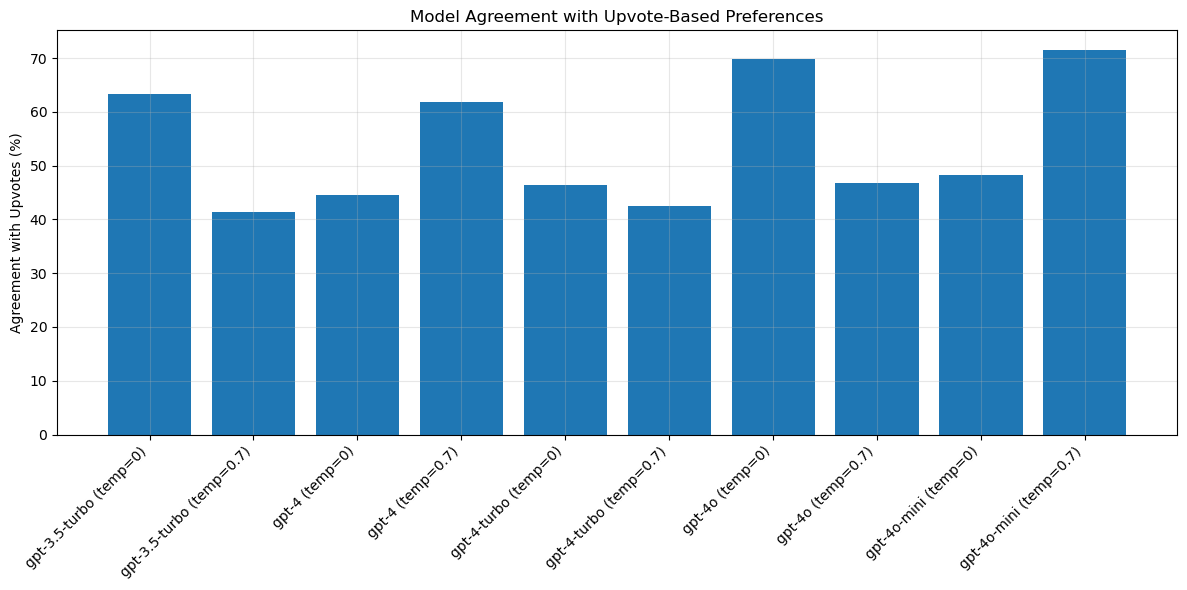


Detailed Results:
--------------------------------------------------
gpt-3.5-turbo (temp=0): 63.31% agreement with upvotes
gpt-3.5-turbo (temp=0.7): 41.37% agreement with upvotes
gpt-4 (temp=0): 44.60% agreement with upvotes
gpt-4 (temp=0.7): 61.87% agreement with upvotes
gpt-4-turbo (temp=0): 46.40% agreement with upvotes
gpt-4-turbo (temp=0.7): 42.45% agreement with upvotes
gpt-4o (temp=0): 69.78% agreement with upvotes
gpt-4o (temp=0.7): 46.76% agreement with upvotes
gpt-4o-mini (temp=0): 48.20% agreement with upvotes
gpt-4o-mini (temp=0.7): 71.58% agreement with upvotes

Number of rows analyzed: 100


In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read both datasets
model_df = pd.read_csv('../cmv/processed_results_only_winners.csv')  # The model comparisons dataset
upvote_df = pd.read_csv('../data/three_arguments.csv')  # The upvotes dataset

def get_upvote_preference(row, arg1, arg2):
    """Return which argument had more upvotes (1 or 2)"""
    upvotes1 = row[f'Argument_{arg1}_Upvotes']
    upvotes2 = row[f'Argument_{arg2}_Upvotes']
    if upvotes1 > upvotes2:
        return arg1
    elif upvotes2 > upvotes1:
        return arg2
    return None  # In case of tie

def calculate_agreement(model_df, upvote_df, model_col):
    """Calculate percentage of times model preference matches upvote preference"""
    agreements = 0
    total = 0
    
    for i in range(len(model_df)):
        # For Arg1 vs Arg2
        model_pref = float(model_df.iloc[i][model_col])
        upvote_pref = get_upvote_preference(upvote_df.iloc[i], 1, 2)
        if upvote_pref is not None:  # Only count if there wasn't a tie
            if (model_pref == 1 and upvote_pref == 1) or (model_pref == 2 and upvote_pref == 2):
                agreements += 1
            total += 1
        
        # For Arg2 vs Arg3
        model_pref = float(model_df.iloc[i][model_col.replace('Arg1_vs_Arg2', 'Arg2_vs_Arg3')])
        upvote_pref = get_upvote_preference(upvote_df.iloc[i], 2, 3)
        if upvote_pref is not None:
            if (model_pref == 2 and upvote_pref == 2) or (model_pref == 3 and upvote_pref == 3):
                agreements += 1
            total += 1
        
        # For Arg3 vs Arg1
        model_pref = float(model_df.iloc[i][model_col.replace('Arg1_vs_Arg2', 'Arg3_vs_Arg1')])
        upvote_pref = get_upvote_preference(upvote_df.iloc[i], 3, 1)
        if upvote_pref is not None:
            if (model_pref == 3 and upvote_pref == 3) or (model_pref == 1 and upvote_pref == 1):
                agreements += 1
            total += 1
    
    return (agreements / total * 100) if total > 0 else 0

# Initialize results dictionary
results = {}

# List of models
models = [
    'gpt-3.5-turbo',
    'gpt-4',
    'gpt-4-turbo',
    'gpt-4o',
    'gpt-4o-mini'
]

# Calculate agreement percentages for each model and temperature
for model in models:
    for temp in [0, 0.7]:
        col = f'{model}_temp_{temp}_Arg1_vs_Arg2_Winner_Original_Arg'
        if col in model_df.columns:
            agreement = calculate_agreement(model_df, upvote_df, col)
            results[f'{model} (temp={temp})'] = agreement

# Create bar plot
plt.figure(figsize=(12, 6))
models = list(results.keys())
values = list(results.values())

# Sort by model name and temperature
sorted_items = sorted(zip(models, values), key=lambda x: (x[0].split()[0], x[0].split('=')[1]))
models, values = zip(*sorted_items)

plt.bar(range(len(results)), values)
plt.xticks(range(len(results)), models, rotation=45, ha='right')
plt.ylabel('Agreement with Upvotes (%)')
plt.title('Model Agreement with Upvote-Based Preferences')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("-" * 50)
for model, agreement in sorted_items:
    print(f"{model}: {agreement:.2f}% agreement with upvotes")

# Print number of rows analyzed
print(f"\nNumber of rows analyzed: {len(model_df)}")

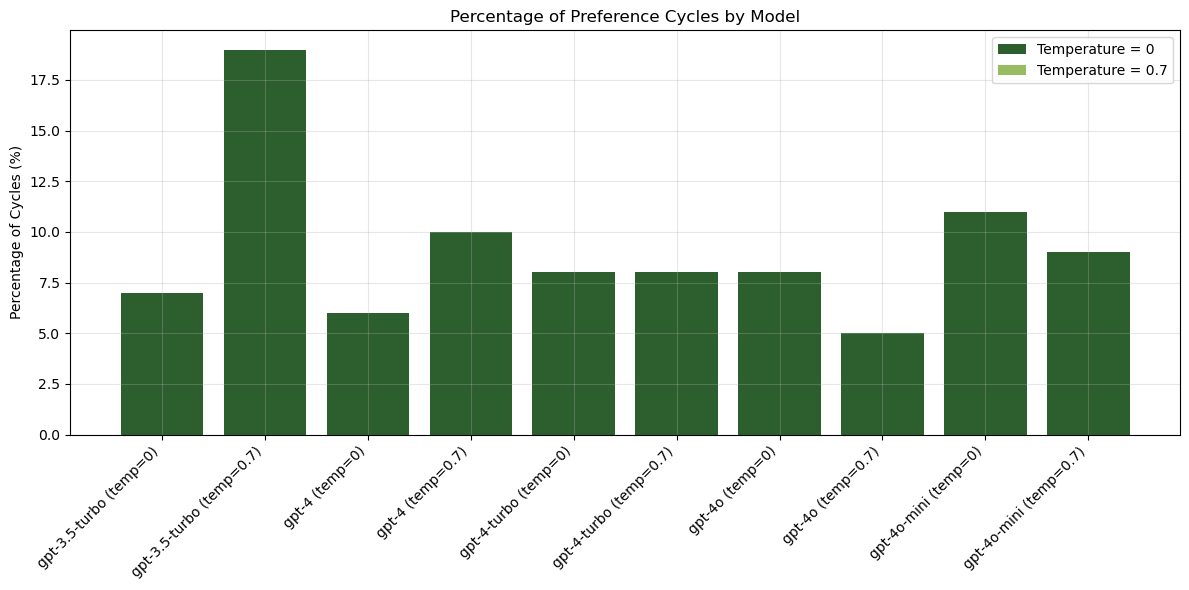


Detailed Results:
--------------------------------------------------
gpt-3.5-turbo (temp=0): 7.00% cycles
gpt-3.5-turbo (temp=0.7): 19.00% cycles
gpt-4 (temp=0): 6.00% cycles
gpt-4 (temp=0.7): 10.00% cycles
gpt-4-turbo (temp=0): 8.00% cycles
gpt-4-turbo (temp=0.7): 8.00% cycles
gpt-4o (temp=0): 8.00% cycles
gpt-4o (temp=0.7): 5.00% cycles
gpt-4o-mini (temp=0): 11.00% cycles
gpt-4o-mini (temp=0.7): 9.00% cycles

Number of rows analyzed: 100


In [152]:
import pandas as pd
import matplotlib.pyplot as plt

def check_for_cycle(row, model, temp):
    """
    Check if there's a cycle in the preferences (A>B>C>A or A<B<C<A)
    Returns True if there's a cycle, False otherwise
    """
    # Get the winners for each comparison
    ab_winner = float(row[f'{model}_temp_{temp}_Arg1_vs_Arg2_Winner_Original_Arg'])
    bc_winner = float(row[f'{model}_temp_{temp}_Arg2_vs_Arg3_Winner_Original_Arg'])
    ca_winner = float(row[f'{model}_temp_{temp}_Arg3_vs_Arg1_Winner_Original_Arg'])
    
    # Check for cycle A>B>C>A
    clockwise = (ab_winner == 1 and bc_winner == 2 and ca_winner == 3)
    # Check for cycle A<B<C<A
    counterclockwise = (ab_winner == 2 and bc_winner == 3 and ca_winner == 1)
    
    return clockwise or counterclockwise

def calculate_cycle_percentage(model_df, model, temp):
    """Calculate percentage of cycles for a given model and temperature"""
    total_rows = len(model_df)
    cycle_count = sum(check_for_cycle(row, model, temp) for _, row in model_df.iterrows())
    return (cycle_count / total_rows * 100) if total_rows > 0 else 0

# Initialize results dictionary
results = {}

# List of models
models = [
    'gpt-3.5-turbo',
    'gpt-4',
    'gpt-4-turbo',
    'gpt-4o',
    'gpt-4o-mini'
]

# Calculate cycle percentages for each model and temperature
for model in models:
    for temp in [0, 0.7]:
        # Check if the columns exist for this model/temperature combination
        if f'{model}_temp_{temp}_Arg1_vs_Arg2_Winner_Original_Arg' in model_df.columns:
            cycle_percent = calculate_cycle_percentage(model_df, model, temp)
            results[f'{model} (temp={temp})'] = cycle_percent

# Create bar plot
plt.figure(figsize=(12, 6))
models = list(results.keys())
values = list(results.values())

# Sort by model name and temperature
sorted_items = sorted(zip(models, values), key=lambda x: (x[0].split()[0], x[0].split('=')[1]))
models, values = zip(*sorted_items)

# Define colors
bar_colors = {"temp_0": "#2C5F2D", "temp_0.7": "#97BC62"}

# Create color list matching the sorted order
colors = ['#2C5F2D' if 'temp=0' in model else '#97BC62' for model in models]

# Plot with colors
plt.bar(range(len(results)), values, color=colors)
plt.xticks(range(len(results)), models, rotation=45, ha='right')
plt.ylabel('Percentage of Cycles (%)')
plt.title('Percentage of Preference Cycles by Model')
plt.grid(True, alpha=0.3)

# Add legend
from matplotlib.patches import Patch
# legend_elements = [Patch(facecolor=bar_colors["temp_0"], label='Temperature = 0'),
                  # Patch(facecolor=bar_colors["temp_0.7"], label='Temperature = 0.7')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("-" * 50)
for model, cycle_percent in sorted_items:
    print(f"{model}: {cycle_percent:.2f}% cycles")

# Print number of rows analyzed
print(f"\nNumber of rows analyzed: {len(model_df)}")